In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import scipy

In [8]:
import sklearn

In [9]:
import warnings

In [10]:
warnings.filterwarnings('ignore')

In [11]:
df=pd.read_csv('Datatrainedabalone.csv')

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [13]:
df.shape

(4177, 9)

there are 4177 rows and 9 columns in dataset

In [14]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

Attribute sex is having object and rings is having integer data type. All other attributes have float datatype

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [16]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [17]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Minimum height cannot be 0 but in the dataset it is showing zero

In [18]:
a=df['Rings'].unique()

In [19]:
a.sort()

In [20]:
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29], dtype=int64)

target has 1 to 29 values excluding 28

In [21]:
df[df['Height']==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [22]:
df['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

we see that all gender data are good enough and removing both infant data with 0 height will not affect the dataset

In [23]:
df.drop(index=[1257,3996],inplace=True)

In [24]:
df.shape

(4175, 9)

two rows have been dropped where height is 0

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
LE=LabelEncoder()

In [27]:
df['Sex']=LE.fit_transform(df['Sex'])

In [28]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [29]:
import seaborn as sns

In [30]:
import matplotlib.pyplot as plt

In [31]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

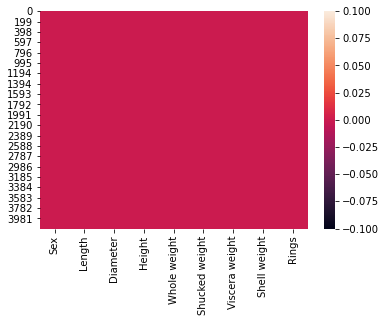

In [32]:
sns.heatmap(df.isnull())

# Now there is no null data in dataset

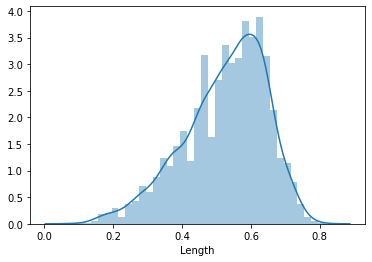

In [33]:
sns.distplot(df['Length'])

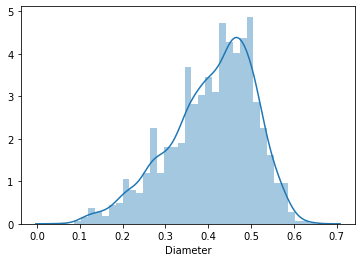

In [34]:
sns.distplot(df['Diameter'])

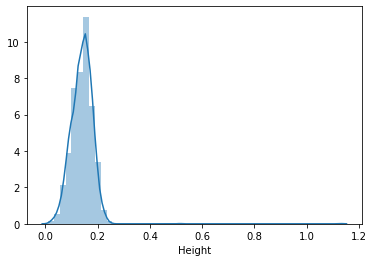

In [35]:
sns.distplot(df['Height'])

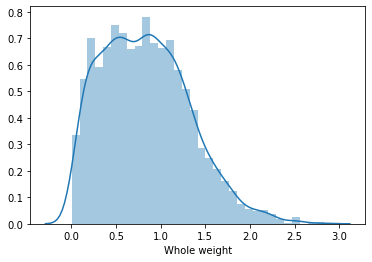

In [36]:
sns.distplot(df['Whole weight'])

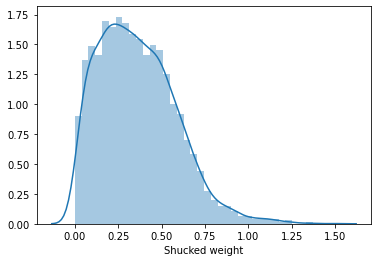

In [37]:
sns.distplot(df['Shucked weight'])

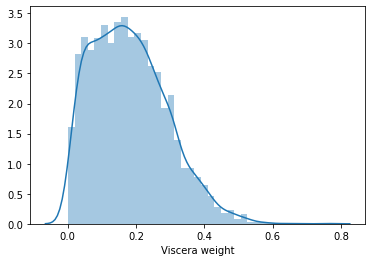

In [38]:
sns.distplot(df['Viscera weight'])

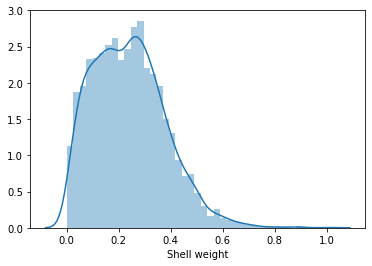

In [39]:
sns.distplot(df['Shell weight'])

In [40]:
df.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height            3.166364
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

There is skewness in height

In [41]:
df['Height']=np.sqrt(df['Height'])

In [42]:
df.skew()

Sex              -0.098224
Length           -0.640993
Diameter         -0.610182
Height           -0.176012
Whole weight      0.530549
Shucked weight    0.718735
Viscera weight    0.591455
Shell weight      0.621081
Rings             1.113754
dtype: float64

In [43]:
from scipy.stats import zscore

In [44]:
z=np.abs(zscore(df))

In [45]:
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  174,  181,  232,  236,  236,  236,  237,
        237,  237,  238,  238,  238,  239,  239,  270,  275,  277,  278,
        294,  306,  310,  313,  314,  321,  333,  334,  351,  355,  358,
        358,  362,  375,  416,  417,  428,  431,  433,  469,  478,  480,
        501,  525,  526,  526,  526,  530,  572,  628,  673,  674,  675,
        678,  694,  694,  696,  696,  718,  719,  719,  719,  720,  720,
        720,  744,  754,  756,  811,  891,  891,  891, 1048, 1051, 1051,
       1052, 1055, 1056, 1174, 1193, 1197, 1199, 1202, 1204, 1206, 1206,
       1207, 1207, 1207, 1207, 1209, 1209, 1416, 1416, 1417, 1421, 1425,
       1426, 1426, 1426, 1427, 1428, 1428, 1428, 1527, 1753, 1755, 1756,
       1758, 1760, 1761, 1761, 1761, 1762, 1762, 1762, 1820, 1823, 1981,
       1985, 1985, 1986, 1986, 1986, 2050, 2089, 2107, 2107, 2113, 2113,
       2113, 2156, 2160, 2168, 2170, 2171, 2175, 2

In [46]:
new_df=df[(z<3).all(axis=1)]

In [47]:
new_df.shape

(4008, 9)

In [48]:
df.shape

(4175, 9)

In [49]:
Dataloss=((4175-4008)/4175)*100

In [50]:
Dataloss

4.0

Dataloss is less than 5%. Thus we can remove outliers

In [51]:
df=new_df

In [52]:
df.shape

(4008, 9)

In [53]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.042189,-0.045213,-0.045882,-0.033691,-0.015267,-0.044145,-0.042897,-0.032452
Length,-0.042189,1.000000,0.985510,0.905133,0.935982,0.910543,0.909218,0.915364,0.557752
Diameter,-0.045213,0.985510,1.000000,0.910792,0.935325,0.905178,0.905070,0.922527,0.576231
Height,-0.045882,0.905133,0.910792,1.000000,0.883656,0.835941,0.861429,0.890758,0.611402
Whole weight,-0.033691,0.935982,0.935325,0.883656,1.000000,0.970666,0.966228,0.960716,0.541971
Shucked weight,-0.015267,0.910543,0.905178,0.835941,0.970666,1.000000,0.929327,0.894918,0.432817
Viscera weight,-0.044145,0.909218,0.905070,0.861429,0.966228,0.929327,1.000000,0.918475,0.516581
Shell weight,-0.042897,0.915364,0.922527,0.890758,0.960716,0.894918,0.918475,1.000000,0.617436
Rings,-0.032452,0.557752,0.576231,0.611402,0.541971,0.432817,0.516581,0.617436,1.000000


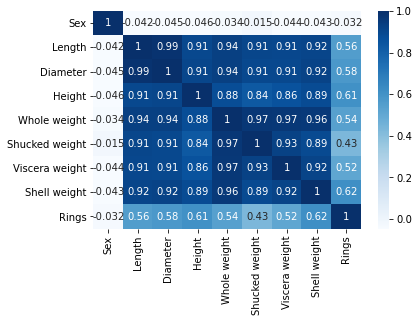

In [54]:
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
x=df.iloc[:,0:-1]

In [57]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [58]:
y=df.iloc[:,-1]

In [59]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4008, dtype: int64

In [60]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF factor']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)
    

In [61]:
vif_calc()

   VIF factor        Features
0    2.630235             Sex
1  802.740682          Length
2  764.333716        Diameter
3  155.662708          Height
4  441.938358    Whole weight
5  110.277777  Shucked weight
6   65.500785  Viscera weight
7   92.761786    Shell weight


Since high multicolinearity exists we shall be using RandomForestRegressor

In [62]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960,10


In [63]:
x=df.iloc[:,0:-1]

In [64]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.308221,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.300000,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.367423,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.353553,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.282843,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.406202,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.367423,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.452769,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.387298,1.0945,0.5310,0.2610,0.2960


In [65]:
x.shape

(4008, 8)

In [66]:
y.shape

(4008,)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scale=StandardScaler()

In [69]:
x=scale.fit_transform(x)

In [70]:
x

array([[ 1.15809659, -0.59153179, -0.43930707, ..., -0.61310017,
        -0.73283145, -0.64112972],
       [ 1.15809659, -1.51249232, -1.49846417, ..., -1.22101607,
        -1.24282071, -1.26926824],
       [-1.28295055,  0.06629717,  0.14322933, ..., -0.4574737 ,
        -0.33941116, -0.17002584],
       ...,
       [ 1.15809659,  0.68027086,  0.72576573, ...,  0.85076131,
         1.0788447 ,  0.59944385],
       [-1.28295055,  0.89954717,  0.83168144, ...,  0.87750961,
         0.82142154,  0.50522307],
       [ 1.15809659,  1.64508665,  1.5730914 , ...,  2.89335873,
         1.94339792,  2.06771762]])

In [71]:
x.shape

(4008, 8)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [75]:
maxr2=0
maxRS=0

In [76]:
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    r2score=r2_score(y_test,pred)
    if r2score>maxr2:
        maxr2=r2score
        maxRS=i
print('Best r2 score is',maxr2,'on random state',maxRS)
    

Best r2 score is 0.569452569576177 on random state 143


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=143)

In [80]:
lr=LinearRegression()

In [81]:
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
pred=lr.predict(x_test)

In [83]:
print('R2 score is ',r2_score(y_test,pred))

R2 score is  0.5474201683007807


In [96]:
from sklearn.svm import SVR

In [97]:
svr=SVR()

In [98]:
svr.fit(x_train,y_train)

SVR()

In [99]:
predsvr=svr.predict(x_test)

In [100]:
print('R2 score is ',r2_score(y_test,predsvr))

R2 score is  0.5759568684059604


In [101]:
from sklearn.linear_model import ElasticNet

In [102]:
enr=ElasticNet()

In [103]:
enr.fit(x_train,y_train)

ElasticNet()

In [104]:
enrpred=enr.predict(x_test)

In [105]:
print('R2 score is ',r2_score(y_test,enrpred))

R2 score is  0.342562278745118


In [116]:
rf=RandomForestRegressor()

In [117]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [121]:
predrf=rf.predict(x_test)

In [122]:
print('R2 score is ',r2_score(y_test,predrf))

R2 score is  0.5741026927640642


Best algorithm is svr

In [123]:
from sklearn.model_selection import cross_val_score

In [124]:
score1=cross_val_score(lr,x,y,cv=5)

In [125]:
print(score1)

[0.38009642 0.20182111 0.49437493 0.49223431 0.47490092]


In [126]:
print(score1.mean())

0.40868553701871296


In [127]:
score2=cross_val_score(svr,x,y,cv=5)

In [128]:
print(score2.mean())

0.4819066010215954


In [129]:
score3=cross_val_score(enr,x,y,cv=5)

In [130]:
print(score3.mean())

0.19851513364520038


In [132]:
score4=cross_val_score(rf,x,y,cv=5)

In [133]:
print(score4.mean())

0.44827224846668623


From cross validation score, we find svr is best algorithm

In [149]:
from sklearn.model_selection import GridSearchCV

In [150]:
parameter={'gamma':['scale','auto'],'verbose':['True','False'],'kernel':['linear','poly','rbf']}

In [151]:
GCV=GridSearchCV(SVR(),parameter,cv=5)

In [152]:
GCV.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

TypeError: an integer is required

In [153]:
GCV.best_params_

{'gamma': 'scale', 'kernel': 'linear', 'verbose': 'True'}

In [154]:
Model_final=SVR(kernel='linear',shrinking=True,verbose=True)

In [155]:
Model_final.fit(x_train,y_train)

[LibSVM]

SVR(kernel='linear', verbose=True)

In [158]:
predfin=Model_final.predict(x_test)

In [159]:
print('R2 score is',r2_score(y_test,predfin))

R2 score is 0.5264548441464199


In [160]:
import joblib

In [161]:
joblib.dump(Model_final,'AbaloneFinal.pkl')

['AbaloneFinal.pkl']